# Parte 3. Seaborn y datos del INE



## Librerías de alto nivel

### Integración de pandas-matplotlib

[Integración de pandas.Matplotlib](https://pandas.pydata.org/pandas-docs/version/0.13/visualization.html#other-plotting-features)


- Visualiza de una forma muy sencilla las gráficas más usuales como line chart, diagrama de barras, histogramas, boxplot, scatter plot y gráficas de doble eje
- También incorpora otras gráficas menos usuales como Parallel Coordinates o 
Lag Plot
- Precisa de matplotlib para ajustar detalles de etiquetado. **Devuelve un objeto ax para que se pueda trabajar con el una vez realizada la gráfica com matplotlib**
- Permite trabajar con subplots de una forma manual o crear Scatter plot matrix


### seaborn


![graficas en seaborn](https://drive.google.com/uc?id=1xfFL8sr5x6oxujZfILxtnVC7KOZYe4ci)


[Seaborn](https://seaborn.pydata.org/) es una librería de visualización de datos de Python basada en matplotlib. 

- Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos
- Es similar a ggplot en aspecto de acabado pero está por debajo en funcionalidad 
- Resuelve las gráficas de una forma particular, no genérica
- Precisa de matplotlib para ajustar detalles de etiquetado. **Devuelve un objeto ax para que se pueda trabajar con él una vez realizada la gráfica**
- Se integra fácilmente con pandas
- Tiene facetas en algunos tipos de gráficas 
- Estilos de presentación

Enlaces de interés:
- [Overview](https://seaborn.pydata.org/tutorial/function_overview.html)
- [Galería de gráficas](https://seaborn.pydata.org/examples/index.html)
- [Control de la estética](https://seaborn.pydata.org/tutorial/aesthetics.html)
- [facetas](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) 
- [Ejemplo de facetas](https://www.python-graph-gallery.com/242-area-chart-and-faceting) 
- [Colores](https://seaborn.pydata.org/tutorial/color_palettes.html)



In [2]:
import seaborn as sns

## Alto-bajo nivel

Seaborn es muy cómodo y tiene una estética muy agradable, pero está limitado por ahora. Cubre un porcentaje elevado de  visualizaciones, pero no todas. Además, necesita la ayuda de Mapplotlib para los detalles

Esta es la relación las posiblidades de Seaborn y Matplotlib con las figuras que hemos estado utilizando en el curso 

| Gráficas                |  Matplotlib   |  Seaborn  | Integración pandas |
|-------------------------|---------------|-----------|--------------------|
| Bars diagram            |     Si        |     Si    |         Si         |
| Line diagram            |     Si        |     Si    |         Si         |    
| Piramide                |     Si        |     No    |         No         |
| Box plot                |     Si        |     Si    |         Si         |
| Dumbbell                |     Si        |     No    |         No         |
| Diagrama de variación   |     Si        |     No    |         No         |
| Scater plot             |     Si        |     Si    |         Si         |
| Scater plot conectado   |     Si        |     No    |         NO         | 
| Gráficas  de doble eje  |     Si        |     Si    |         Si         |   
| Mapas de calor          |     Si        |     Si    |         No         |



|Utilidades               |  Matplotlib   |  Seaborn  |  Integraciín pandas|
|-------------------------|---------------|-----------|--------------------|
|Facetas                  |    Manual     | Man/ Aut. |        -           |
|Aninación                |    Manual     | Manual    |        Manual      |






 # Ejemplos

Para ver la diferencia de cómo se hace una gráfica en matplotlib y cómo en seaborn o dese pandas, vamos a ver varios ejemplos con tatos similares a los utilizados en R para ver mejor las diferencias entre ambos entornos







## Datos del paro

![tabla 4247](https://drive.google.com/uc?id=16i3flIl774N418dTUITtYMre-xyzS8Ly)

La tabla 4247 del INE proporciona los datos del paro desglosados por:
- Sexo,
- Autonomías
- Grupos de Edad (no son disjuntos)
- Periodo (por trimestre)

También aparecen agregados por
- Sexo (Ambos sexos)
- Autonomías (Total nacional)
- Grupos de Edad (Total Edad)

En algunos casos interesará el dato desglosado y en otros el agregado

Los vamos a bajar en linea del INE. Hay que tener cuidado porque los datos del INE pueden no estar completos. Los valores nulos lo representa como '..'. Si no se le indica esto a la función  read_csv, no hará bien la conversión a valores numéricos. también hay que indicarle que la notación es la europea con  thousands='.' y  decimal = ','

- Le vamos a cambiar el nombre a la columna "Comunidades y ciudades Autónomas" por ccaa para trabajar más cómodo
- Creamos las columnas Month y Year que serán necesarias para los ejemplos


### Leemos los datos

No tememos entorno local. Hay que especificarle las características del país. El parser es muy sensible a errores que el de tidyverse. Por ejemplo, si no le especificas el valor nulo no funciona bien. Por otra parte, permite hacer filtrado específico de los datos, por ejemplo de fechas.


In [4]:
import re
import datetime as DT
import pandas as pd

def df_quarter(date):
    q = {'1':'-03-31', '2':'-06-30', '3':'-09-30', '4':'-12-31'}
    date = re.sub('T(\d)', lambda match, q=q: q[match.group(1)], date)
    return DT.datetime.strptime(date, '%Y-%m-%d')

# Este código es para leerlo desde API

#paro_df = pd.read_csv('https://www.ine.es/jaxiT3/files/t/es/csv_bdsc/4247.csv?nocab=1',
#                    sep = ';',
#                    thousands='.', 
#                    decimal = ',',
#                    na_values=[".."],
#                    parse_dates=[3],
#                    date_parser=df_quarter)


# Este código es para leer desde el fichero 4247.csv
# Tiene que estar en el mismo directorio 

paro_df = pd.read_csv("4247.csv",
                    sep = ';', 
                    decimal = ',',
                    na_values=[".."],
                    parse_dates=[3],
                    date_parser=df_quarter)
paro_df.columns = ['Sexo','ccaa','Edad','Periodo','Total' ]
paro_df['month'] = pd.DatetimeIndex(paro_df['Periodo']).month #le añado month para futuros filtros
paro_df['year'] = pd.DatetimeIndex(paro_df['Periodo']).year #le añado year para futuros filtros
paro_df["code"], paro_df["ccaa"] = paro_df["ccaa"].str.split(" ", 1).str
paro_df.info()
print(paro_df)


<ipython-input-4-c23577fdd1dc>:29: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  paro_df["code"], paro_df["ccaa"] = paro_df["ccaa"].str.split(" ", 1).str


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33180 entries, 0 to 33179
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Sexo     33180 non-null  object        
 1   ccaa     33180 non-null  object        
 2   Edad     33180 non-null  object        
 3   Periodo  33180 non-null  datetime64[ns]
 4   Total    33180 non-null  float64       
 5   month    33180 non-null  int64         
 6   year     33180 non-null  int64         
 7   code     33180 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 2.0+ MB
              Sexo      ccaa           Edad    Periodo  Total  month  year  \
0      Ambos sexos  Nacional          Total 2021-09-30  14.57      9  2021   
1      Ambos sexos  Nacional          Total 2021-06-30  15.26      6  2021   
2      Ambos sexos  Nacional          Total 2021-03-31  15.98      3  2021   
3      Ambos sexos  Nacional          Total 2020-

 
## Datos de la inflación

![tabla 22344](https://drive.google.com/uc?id=1pTH0LtNb4Tc9R4Le-vf1XlvxQ4n190f8)

La tabla del INE 22344 contienen los Índices nacionales del IPC: general y de grupos ECOICOP.

ECOICOP (European Classification of Individual Consumption by Purpose) es la nueva clasificación europea de consumo, que ofrecer un mayor
desglose de algunas de las parcelas de gasto, mejora la interrelación con otras
estadísticas como el Índice de Precios de Consumo (IPC)

Los datos que vamos a tomar son los destacados en negrita:

- **Índice general**
- **Los datos se suministran mensualmente**
- El dato vienen calculado en:
  - Índice mensual respecto a la variación del año x
  - **Variación mensual de respecto el año anterior**
  - Variación mensual desde principio de año
    

### Leemos los datos

In [5]:
def df_month(date):
    q = {'01':'-01-31', '02':'-02-28', '03':'-03-31', '04':'-04-30', '05':'-05-31',
        '06':'-06-30','07':'-07-31','08':'-08-31','09':'-09-30','10':'-10-31',
        '11':'-11-30','12':'-12-31'}
    date = re.sub('M(\d+)', lambda match, q=q: q[match.group(1)], date)
    return DT.datetime.strptime(date, '%Y-%m-%d')

inflacion_df = pd.read_csv('https://www.ine.es/jaxiT3/files/t/es/csv_bdsc/22344.csv.csv?nocab=1',
                    sep = ';',
                    thousands='.', 
                    decimal = ',',
                    na_values=[".."],
                    parse_dates=[2],
                    date_parser=df_month)

inflacion_df['month'] = pd.DatetimeIndex(inflacion_df['Periodo']).month #le añado month para futuros filtros
inflacion_df.info()
inflacion_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12480 entries, 0 to 12479
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Grupos ECOICOP  12480 non-null  object        
 1   Tipo de dato    12480 non-null  object        
 2   Periodo         12480 non-null  datetime64[ns]
 3   Total           12480 non-null  float64       
 4   month           12480 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 487.6+ KB


,Grupos ECOICOP,Tipo de dato,Periodo,Total,month
0,Índice general,Índice,2021-12-31,111.524,12
1,Índice general,Índice,2021-11-30,110.208,11
2,Índice general,Índice,2021-10-31,109.871,10
3,Índice general,Índice,2021-09-30,107.887,9
4,Índice general,Índice,2021-08-31,106.995,8


## Cuál es la evolución del paro por género

Vamos  a ver mediante un line chart cómo se hace en matoplotlib, en la integración de pandas-maptplotlib y seaborn


### matplotlib: line chart

Necesitamos:
- Seleccionar los datos. Trabaja con datos a lo alto o a lo ancho ya que pintamos las líneas una a una. En este caso vamos a usar los datos a lo largo que es como están por defecto
- hay que iterar porque no tiene concepto de la estructura de datos. Solo pinta arrays
- Se puede asociar el color al dato
- Poner los títulos



In [6]:

paroq_df = paro_df[(paro_df['Sexo'] != 'Ambos sexos')
                & (paro_df['Edad'] == 'Total')
                & (paro_df['ccaa'] == 'Nacional')] #filtramos datos
print (paroq_df)
paroq_df.info()

          Sexo      ccaa   Edad    Periodo  Total  month  year   code
11060  Hombres  Nacional  Total 2021-09-30  12.97      9  2021  Total
11061  Hombres  Nacional  Total 2021-06-30  13.39      6  2021  Total
11062  Hombres  Nacional  Total 2021-03-31  14.07      3  2021  Total
11063  Hombres  Nacional  Total 2020-12-31  14.17     12  2020  Total
11064  Hombres  Nacional  Total 2020-09-30  14.39      9  2020  Total
...        ...       ...    ...        ...    ...    ...   ...    ...
22194  Mujeres  Nacional  Total 2003-03-31  16.73      3  2003  Total
22195  Mujeres  Nacional  Total 2002-12-31  16.00     12  2002  Total
22196  Mujeres  Nacional  Total 2002-09-30  16.20      9  2002  Total
22197  Mujeres  Nacional  Total 2002-06-30  16.04      6  2002  Total
22198  Mujeres  Nacional  Total 2002-03-31  16.35      3  2002  Total

[158 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 11060 to 22198
Data columns (total 8 columns):
 #   Column   Non-Null Cou

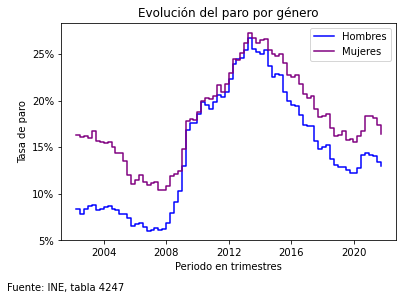

In [7]:
import matplotlib.ticker as mtick #para formatar los ticks
import matplotlib.pyplot as plt
#sns.set_style("ticks")

fuente= "Fuente: INE, tabla 4247"
generos = pd.unique(paroq_df['Sexo']).tolist() # Obtenemos la lista para iterar
paleta_genero = {'Hombres':'blue','Mujeres':'purple'} # dict para asignar color


fmt = '%.0f%%' # Formato de los ticks'

fig, ax = plt.subplots () # Creamos el contenedor y el eje
for genero in generos: # Iteramos por género
    x = paroq_df[paroq_df['Sexo'] == genero].Periodo # Valor eje x
    y = paroq_df[paroq_df['Sexo'] == genero].Total #valor eje y
    
    color=paleta_genero[genero] #color línea
    #ax.plot(x, y, label=genero, color=color) # Pintamos la gráfica
    #ax.fill_between(x, y,  color=color,  alpha=0.5) # Pintamos la gráfica
    ax.step(x, y, label=genero, color=color) # Pintamos la gráfica

yticks = mtick.FormatStrFormatter(fmt) # Definimos el formato % al eje y 
ax.yaxis.set_major_formatter(yticks) # Aplicamos formato % al eje y
ax.set_title("Evolución del paro por género")  # Añadimos título
ax.set_xlabel('Periodo en trimestres') # Añadimos etiqueta eje x
ax.set_ylabel('Tasa de paro') # Añadimos etiqueta eje y
ax.legend(title ="Sexo", labels =["H","M"])  # Añadimos leyenda.
ax.legend()  # Añadimos leyenda.
plt.figtext(x=0,y=-.05,s=fuente,ha='left') #añadimos el caption manualmente
plt.rcParams["figure.figsize"]=[10,6]
plt.show()

### pandas-matplotlib: line chart

Para hacer el line chat espera que:
- El índice del dataframe sea una fecha
- Cada una de las líneas tiene que estar en una columna. Es necesario ensanchar

In [8]:
paroq2_df = paro_df[(paro_df['Sexo'] != 'Ambos sexos')
                & (paro_df['Edad'] == 'Total')
                & (paro_df['ccaa'] == 'Nacional')] #filtramos datos
paroq2_df = paroq2_df.pivot(index = 'Periodo', columns ='Sexo', values ='Total')
print (paroq2_df)
paroq2_df.info()

Sexo        Hombres  Mujeres
Periodo                     
2002-03-31     8.36    16.35
2002-06-30     7.86    16.04
2002-09-30     8.33    16.20
2002-12-31     8.65    16.00
2003-03-31     8.76    16.73
...             ...      ...
2020-09-30    14.39    18.39
2020-12-31    14.17    18.33
2021-03-31    14.07    18.13
2021-06-30    13.39    17.36
2021-09-30    12.97    16.36

[79 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79 entries, 2002-03-31 to 2021-09-30
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Hombres  79 non-null     float64
 1   Mujeres  79 non-null     float64
dtypes: float64(2)
memory usage: 1.9 KB


Con color por defecto

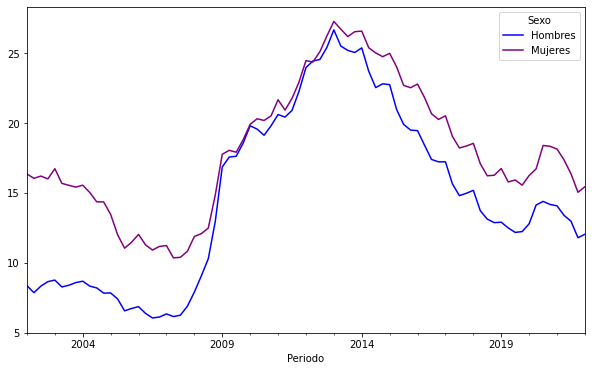

In [8]:

ax = paroq2_df.plot(color=paleta_genero )



- Añadimos detalles

Text(0, -0.05, 'Fuente: INE, tabla 4247')

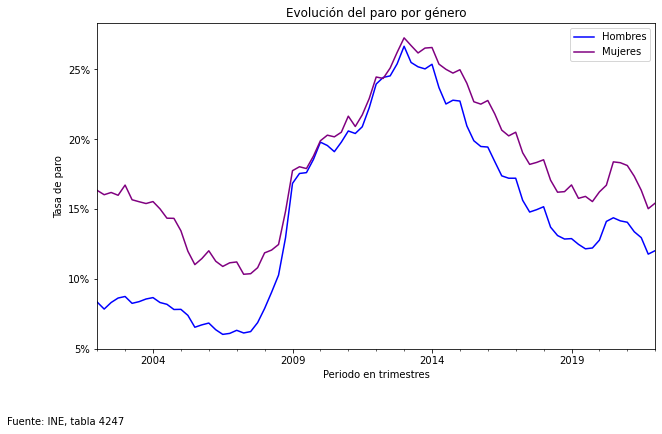

In [9]:
fmt = '%.0f%%' # Formato de los ticks'

ax = paroq2_df.plot(color=paleta_genero)

# Completamos detalles con matplotlib
yticks = mtick.FormatStrFormatter(fmt) # Definimos el formato % al eje y 
ax.yaxis.set_major_formatter(yticks) # Aplicamos formato % al eje y
ax.set_title("Evolución del paro por género")  # Añadimos título
ax.set_xlabel('Periodo en trimestres') # Añadimos etiqueta eje x
ax.set_ylabel('Tasa de paro') # Añadimos etiqueta eje y
ax.legend()  # Añadimos leyenda.
plt.figtext(x=0,y=-.05,s=fuente,ha='left') #anadimos el caption manualmente

Text(0, -0.05, 'Fuente: INE, tabla 4247')

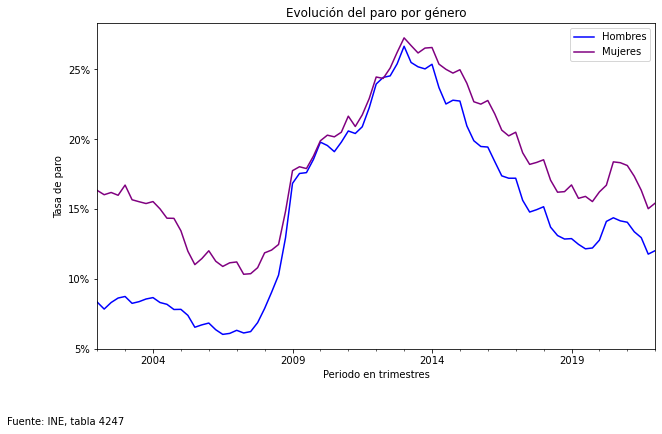

In [10]:
fmt = '%.0f%%' # Formato de los ticks'

paroq2_df.Hombres.plot(color='blue') #
ax = paroq2_df.Mujeres.plot(color='purple')

# Completamos detalles con matplotlib
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
ax.set_title("Evolución del paro por género")  # Añadimos título
ax.set_xlabel('Periodo en trimestres') # Añadimos etiqueta eje x
ax.set_ylabel('Tasa de paro') # Añadimos etiqueta eje y
ax.legend()  # Añadimos leyenda.
plt.figtext(x=0,y=-.05,s=fuente,ha='left') #anadimos el caption manualmente


### Seaborn: line char

- Usaremos [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html)
- No es necesario iterar

- Necesita los datos en la misma columna (a lo largo)
- La interfaz se parece mucho a ggplot


In [11]:
paroq_df = paro_df[(paro_df['Sexo'] != 'Ambos sexos')
                & (paro_df['Edad'] == 'Total')
                & (paro_df['ccaa'] == 'Nacional')] #filtramos datos
print (paroq_df)
paroq_df.info()

          Sexo      ccaa   Edad    Periodo  Total  month  year   code
11340  Hombres  Nacional  Total 2022-03-31  12.04      3  2022  Total
11341  Hombres  Nacional  Total 2021-12-31  11.79     12  2021  Total
11342  Hombres  Nacional  Total 2021-09-30  12.97      9  2021  Total
11343  Hombres  Nacional  Total 2021-06-30  13.39      6  2021  Total
11344  Hombres  Nacional  Total 2021-03-31  14.07      3  2021  Total
...        ...       ...    ...        ...    ...    ...   ...    ...
22756  Mujeres  Nacional  Total 2003-03-31  16.73      3  2003  Total
22757  Mujeres  Nacional  Total 2002-12-31  16.00     12  2002  Total
22758  Mujeres  Nacional  Total 2002-09-30  16.20      9  2002  Total
22759  Mujeres  Nacional  Total 2002-06-30  16.04      6  2002  Total
22760  Mujeres  Nacional  Total 2002-03-31  16.35      3  2002  Total

[162 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 11340 to 22760
Data columns (total 8 columns):
 #   Column   Non-Null Cou

<AxesSubplot:xlabel='Periodo', ylabel='Total'>

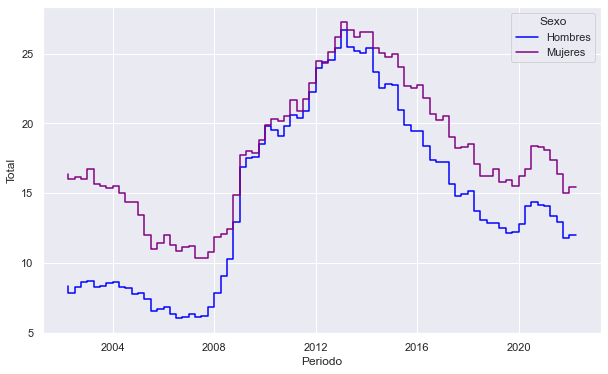

In [12]:
sns.set_theme() #look ggplot

paleta_genero = {'Hombres':'blue','Mujeres':'purple'} # dict para asignar color

sns.lineplot(
    data=paroq_df,
    x = "Periodo", y = "Total",  drawstyle='steps-pre',
    hue = "Sexo", palette = paleta_genero
    
)


Si queremos personalizarlo más, hay que recurrir a **matplotlib**


Text(0, -0.05, 'Fuente: INE, tabla 4247')

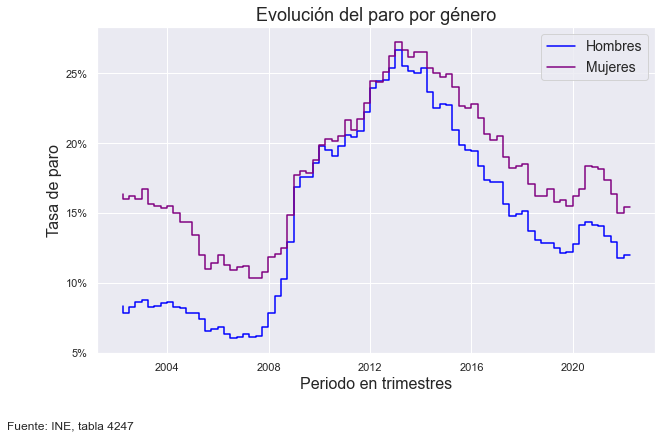

In [13]:
paleta_genero = {'Hombres':'blue','Mujeres':'purple'} # dict para asignar colo

ax = sns.lineplot(
    data=paroq_df,
    x = "Periodo", y = "Total",  drawstyle='steps-pre',
    hue = "Sexo", palette = paleta_genero
    
)
# Completamos detalles con matplotlib
yticks = mtick.FormatStrFormatter(fmt) # Definimos el formato % al eje y 
ax.yaxis.set_major_formatter(yticks) # Aplicamos formato % al eje y
ax.set_title("Evolución del paro por género",fontsize = 18)  # Añadimos título
ax.set_xlabel('Periodo en trimestres',fontsize = 16) # Añadimos etiqueta eje x
ax.set_ylabel('Tasa de paro',fontsize = 16) # Añadimos etiqueta eje y
plt.legend (fontsize = 14)
plt.figtext(x=0,y=-.05,s=fuente,ha='left') #anadimos el caption manualmente


### Ejercicio

- Hacer la evolución del paro por edad en Matplotlib y en Seaborn



In [16]:
# En Matplotlib

In [17]:
# En Sea born 

## Cuál es la evolución del paro por autonomías

### seaborn line chart con facetas

In [14]:
paroqa_df = paro_df[(paro_df['Sexo'] == 'Ambos sexos')
                & (paro_df['Edad'] == 'Total')]

print (paroqa_df)
paroqa_df.info()

              Sexo      ccaa   Edad    Periodo  Total  month  year   code
0      Ambos sexos  Nacional  Total 2022-03-31  13.65      3  2022  Total
1      Ambos sexos  Nacional  Total 2021-12-31  13.33     12  2021  Total
2      Ambos sexos  Nacional  Total 2021-09-30  14.57      9  2021  Total
3      Ambos sexos  Nacional  Total 2021-06-30  15.26      6  2021  Total
4      Ambos sexos  Nacional  Total 2021-03-31  15.98      3  2021  Total
...            ...       ...    ...        ...    ...    ...   ...    ...
10849  Ambos sexos   Melilla  Total 2003-03-31   1.95      3  2003     19
10850  Ambos sexos   Melilla  Total 2002-12-31   3.57     12  2002     19
10851  Ambos sexos   Melilla  Total 2002-09-30   2.60      9  2002     19
10852  Ambos sexos   Melilla  Total 2002-06-30   0.41      6  2002     19
10853  Ambos sexos   Melilla  Total 2002-03-31  10.30      3  2002     19

[1620 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1620 entries, 0 to 10853
Data columns

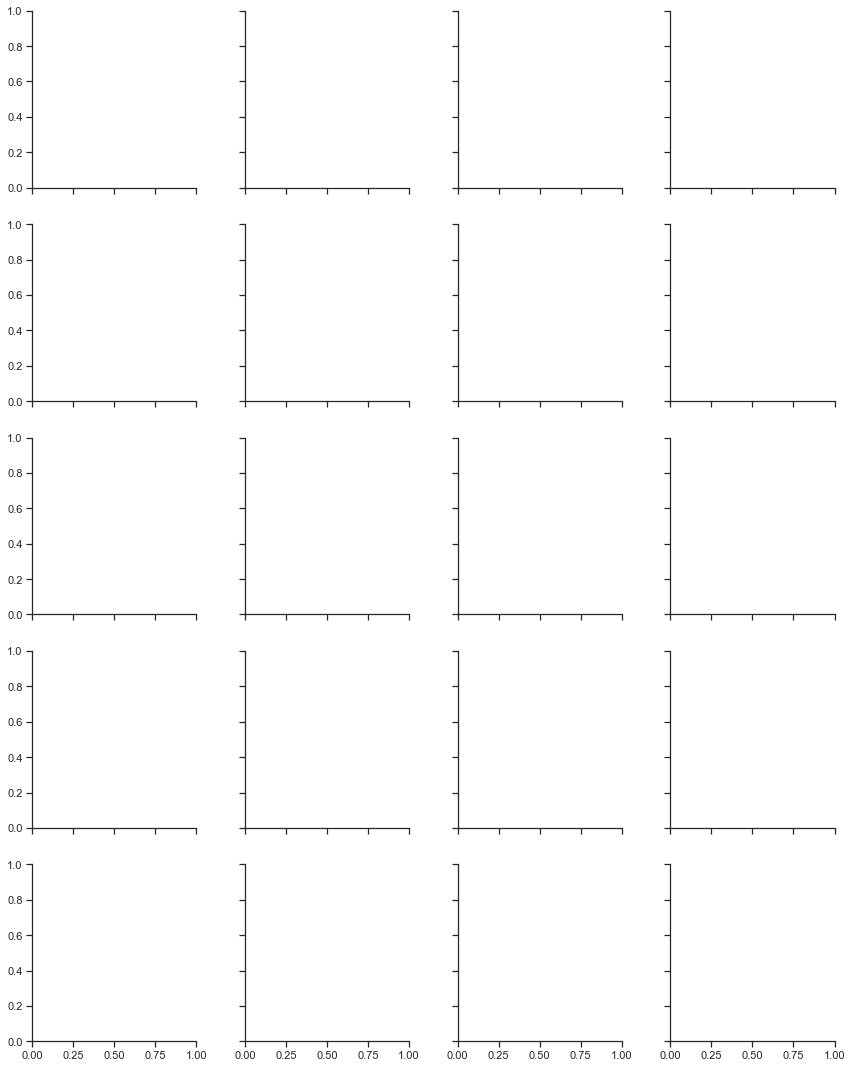

In [15]:
#creamos el grid por ccaa
sns.set_style("ticks")
g = sns.FacetGrid(paro_df, col='ccaa', hue='ccaa', col_wrap=4, )



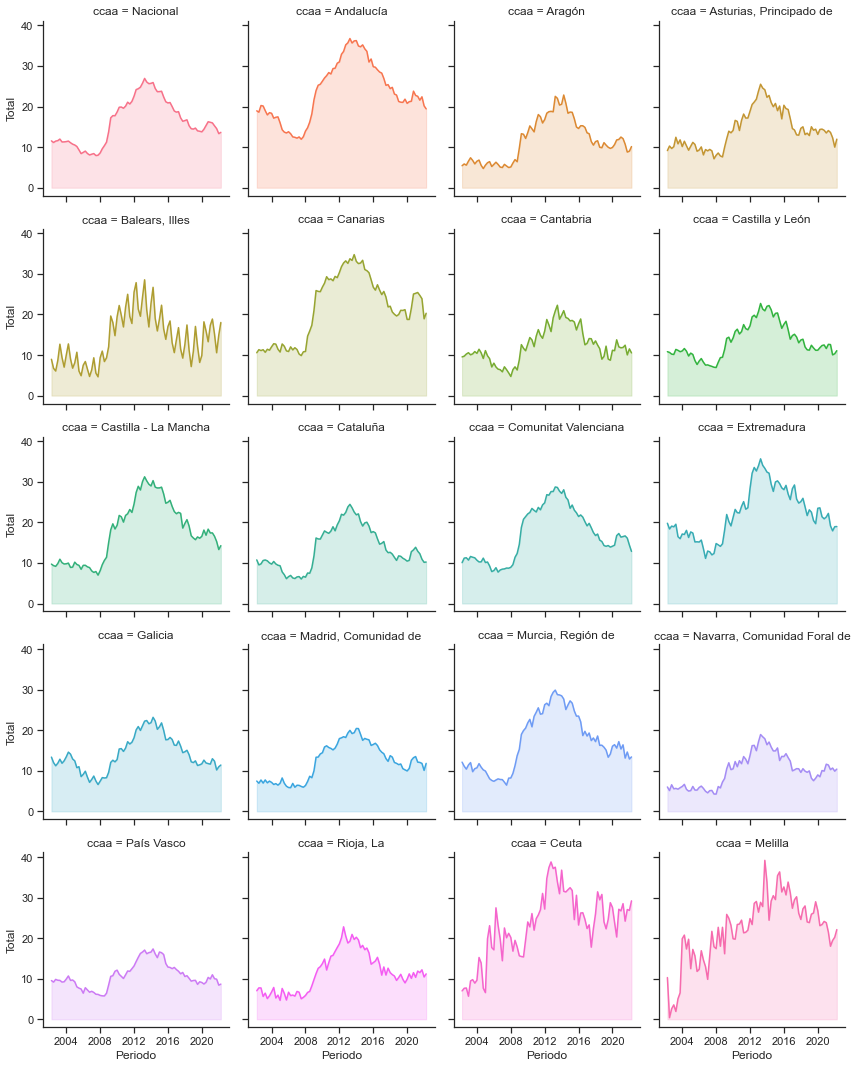

In [20]:
#creamos el grid por ccaa
g = sns.FacetGrid(paroqa_df, col='ccaa', hue='ccaa', col_wrap=4 )
# Dibulamos la línea de evolución del paro
g = g.map(plt.plot, 'Periodo', 'Total')
# Rellenamos el área
g = g.map(plt.fill_between, 'Periodo', 'Total', alpha=0.2)

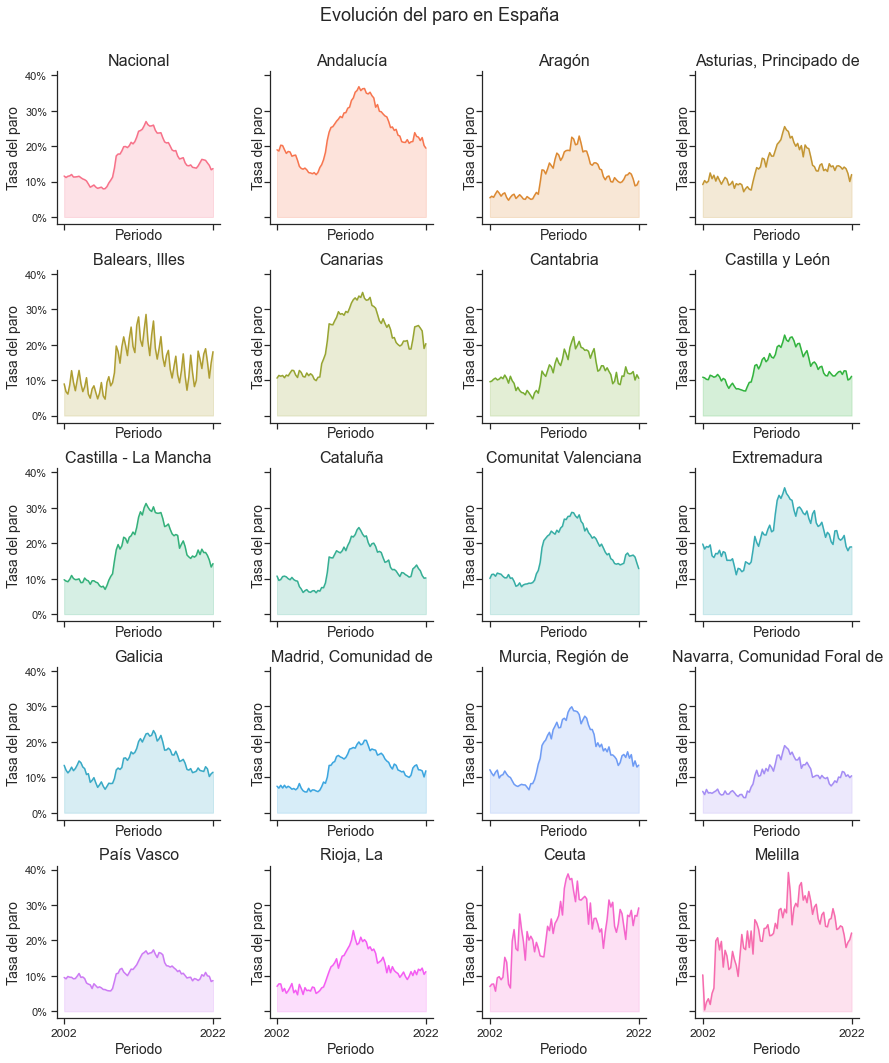

In [16]:
import matplotlib.dates as mdates
mis_tricks = [min(paroqa_df.Periodo),max(paroqa_df.Periodo)]
fmt = '%.0f%%' # Formato de los ticks'
yticks = mtick.FormatStrFormatter(fmt)

#creamos el grid por ccaa
g = sns.FacetGrid(paroqa_df, col='ccaa', hue='ccaa', col_wrap=4, )
#g = sns.FacetGrid(paroqa_df, col='ccaa',  col_wrap=4, )
# Dibulamos la línea de evolución del paro
g = g.map(plt.plot, 'Periodo', 'Total')
# Rellenamos el área
g = g.map(plt.fill_between, 'Periodo', 'Total', alpha=0.2)
# ---------------Ajustes -------------------------
for ccaa, ax in g.axes_dict.items():
    ax.set_title(ccaa,fontsize= 16) # title of plot
    ax.set_xlabel('Periodo',fontsize = 14)  #xlabel
    ax.set_ylabel('Tasa del paro', fontsize = 14) #ylabel
    ax.set_xticks (mis_tricks)
    ax.set_xticklabels (mis_tricks, fontsize = 12)
    ax.yaxis.set_major_formatter(yticks) # Aplicamos formato % al eje y
    ax.xaxis.set_major_formatter( mdates.DateFormatter('%Y'))
# Añadimos título 
g = g.fig.suptitle('Evolución del paro en España', fontsize = 18)
# Ajustamos separación de facetas
plt.subplots_adjust(top=0.92, wspace =0.3, hspace =0.3)


### Mapa de calor con seaborn

- Seleccionamos solo un mes de cada año para que no salgan muy apelmazadas las etiquetas del eje x
- Requiere los datos ensanchados por fecha
- Usamos 'year' en vez de 'Periodo' porque hay un problema con el formato de la fecha al ensancharla
- Ordenamos descendentemente (después de haber ensanchado) respecto al paro del último año
- Colores más ocuros en valires mas altos (añadir al final del nombre de la paleta '_r'


In [17]:

parom_df = paro_df[(paro_df['Sexo'] == 'Ambos sexos')
                            & (paro_df['Edad'] == 'Total')
                            & (paro_df['ccaa'] != 'Nacional')
                            & (paro_df['month'] == 9)] #selecciono solo el mes de septiembre
max_year = max(parom_df.year)
parom_df = parom_df.pivot("ccaa", "year", "Total")
parom_df.sort_values(max_year, ascending=False, inplace=True)
print (parom_df)



year                          2002   2003   2004   2005   2006   2007   2008  \
ccaa                                                                           
Ceuta                         7.73   8.93   7.67  17.69  19.79  21.20  17.85   
Canarias                     11.11  11.20  11.45  11.03  11.81  10.80  17.36   
Andalucía                    20.26  18.50  17.47  13.50  12.43  12.57  18.21   
Melilla                       2.60   6.53  19.75  11.82  12.98  17.89  22.69   
Extremadura                  19.09  15.99  16.28  15.22  11.13  12.34  14.72   
Comunitat Valenciana         11.29  11.27  11.19   7.88   8.27   8.71  12.34   
Castilla - La Mancha          9.17   9.75   8.98   8.44   8.86   7.00  11.40   
Murcia, Región de            10.43  10.55  10.25   7.65   7.88   8.21  13.75   
Asturias, Principado de       9.67  11.80   9.25   8.99   9.41   7.13   7.60   
Rioja, La                     7.74   5.81   5.98   4.77   5.73   5.42   8.25   
Madrid, Comunidad de          7.75   7.4

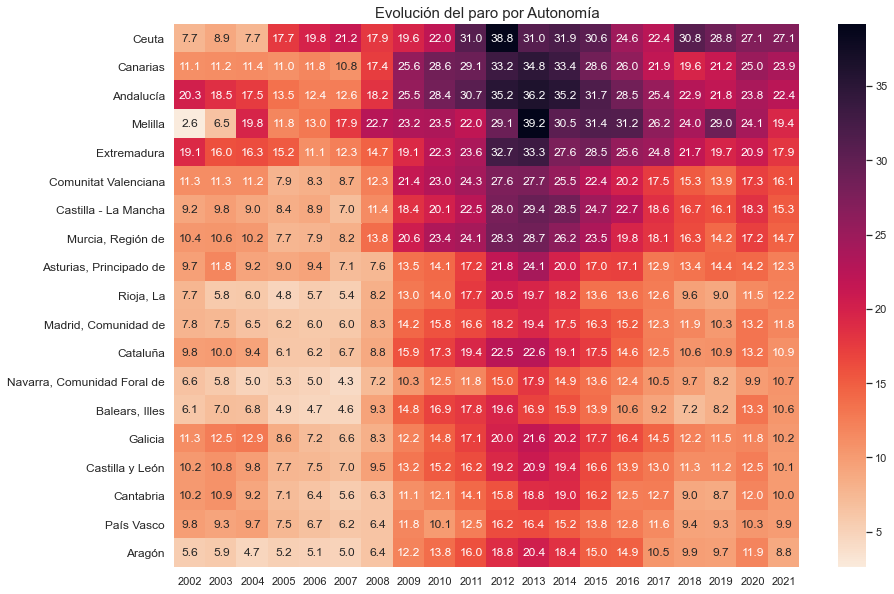

In [18]:
sns.set_theme()

plt.rcParams["figure.figsize"]=[14,10]
ax = sns.heatmap(parom_df, annot = True, fmt='.1f', cmap='rocket_r') 
ax.set_title("Evolución del paro por Autonomía",size =15)
ax.set_xlabel('')  #xlabel
ax.set_ylabel('') #ylabel
ax.yaxis.set_tick_params(labelsize=12)


## ¿Cuál es la distribución del paro por edad?

- En matplotlib y en pandas-matplotlib necesita los datos a lo ancho. En seaborn a lo alto 

### box plot en mathplotlib

- [Hay varias maneras de hacerlo](https://matplotlib.org/3.1.1/gallery/statistics/boxplot_demo.html)

- Necesitamos transformar los datos, hay que poner los grupos de edad a lo ancho y en formato array. Aquí información de paso [ancho-alto](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)




In [19]:
sns.set_style("ticks")
fmt = '%.0f%%' # Formato de los ticks'
paroq3_df = paro_df[(paro_df['Sexo'] == 'Ambos sexos')
                            & (paro_df['Edad'] != 'Total')
                            & (paro_df['Edad'] != 'Menores de 25 años')
                            & (paro_df['Edad'] != '25 y más años')
                            & (paro_df['ccaa'] == 'Nacional')] #filtramos datos

paroqe_ancho_df = paroq3_df.pivot(index='Periodo', columns='Edad',values='Total') #pasamos a modelo ancho con Edad
paroqe_ancho_df.info()
print (paroqe_ancho_df)

datos = paroqe_ancho_df.values



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2002-03-31 to 2022-03-31
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   55 y más años    81 non-null     float64
 1   De 16 a 19 años  81 non-null     float64
 2   De 20 a 24 años  81 non-null     float64
 3   De 25 a 54 años  81 non-null     float64
dtypes: float64(4)
memory usage: 3.2 KB
Edad        55 y más años  De 16 a 19 años  De 20 a 24 años  De 25 a 54 años
Periodo                                                                     
2002-03-31           7.00            28.42            20.42            10.34
2002-06-30           6.76            29.48            19.49             9.97
2002-09-30           7.11            30.06            19.89            10.22
2002-12-31           7.01            31.55            21.03            10.30
2003-03-31           6.75            33.85            20.85            10.83
...                   .

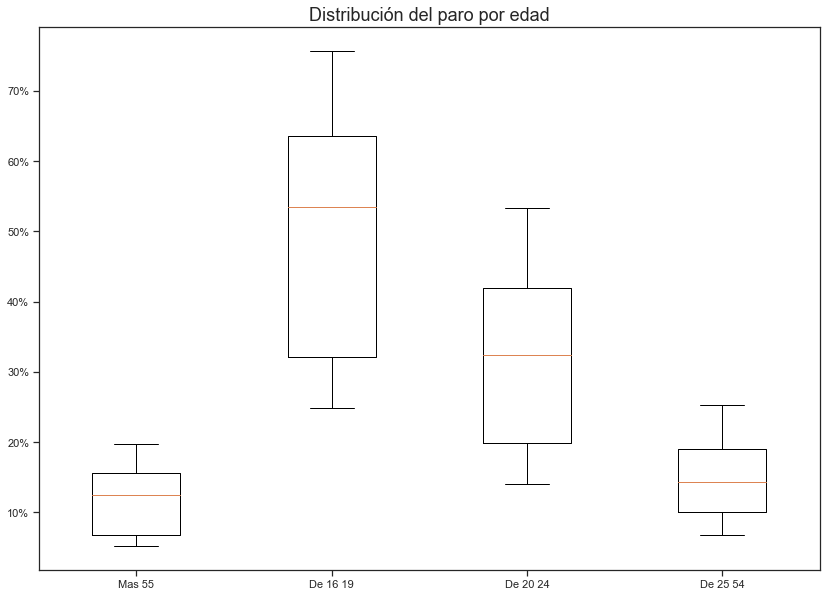

In [20]:
labels =('Mas 55','De 16 19','De 20 24','De 25 54',)
fmt = '%.0f%%' # Formato de los ticks'
fig, ax = plt.subplots () # Creamos el contenedor
ax.boxplot(datos,labels=labels) # Pintamos la gráfica
#ax.boxplot(paroq3_df) # Pintamos la gráfica
yticks = mtick.FormatStrFormatter(fmt) # Definimos el formato % al eje y 
ax.yaxis.set_major_formatter(yticks) # Aplicamos formato % al eje y
ax.set_title("Distribución del paro por edad", fontsize =18)  # Añadimos título
plt.rcParams["figure.figsize"]=[10,6]
plt.show()

### box plot con pandas-matplotlib

- Sirven los mismos datos que en matplotlib 

<AxesSubplot:>

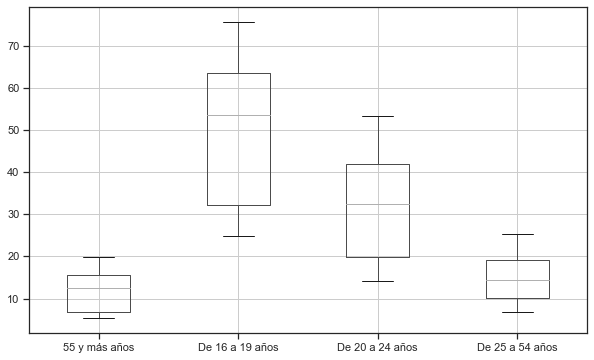

In [21]:
paroqe_ancho_df.boxplot() #orden por defecto, alfabético
#paroqe_ancho_df.boxplot(column=['De 16 a 19 años', 'De 20 a 24 años', 'De 25 a 54 años', '55 y más años']) #forzar orden



- Añadimos detalles


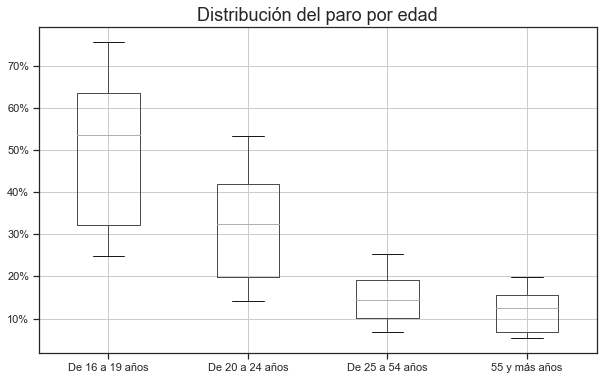

In [27]:

fmt = '%.0f%%' # Formato de los ticks'
ax =paroqe_ancho_df.boxplot(column=['De 16 a 19 años', 'De 20 a 24 años', 'De 25 a 54 años', '55 y más años'])

# Completamos detalles con matplotlib
yticks = mtick.FormatStrFormatter(fmt) # Definimos el formato % al eje y 
ax.yaxis.set_major_formatter(yticks) # Aplicamos formato % al eje y
ax.set_title("Distribución del paro por edad", fontsize =18)  # Añadimos título
plt.rcParams["figure.figsize"]=[10,6]
plt.show()


### box plot en Seaborn

- Necesita los datos a lo largo


 [Documentación seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

In [22]:
#filtramos datos
paroq_df = paro_df[(paro_df['Sexo'] == 'Ambos sexos')
                            & (paro_df['Edad'] != 'Total')
                            & (paro_df['Edad'] != 'Menores de 25 años')
                            & (paro_df['Edad'] != '25 y más años')
                            & (paro_df['ccaa'] == 'Nacional')]
print (paroq_df)

            Sexo      ccaa             Edad    Periodo  Total  month  year  \
243  Ambos sexos  Nacional  De 16 a 19 años 2022-03-31  46.43      3  2022   
244  Ambos sexos  Nacional  De 16 a 19 años 2021-12-31  49.22     12  2021   
245  Ambos sexos  Nacional  De 16 a 19 años 2021-09-30  42.82      9  2021   
246  Ambos sexos  Nacional  De 16 a 19 años 2021-06-30  56.56      6  2021   
247  Ambos sexos  Nacional  De 16 a 19 años 2021-03-31  58.23      3  2021   
..           ...       ...              ...        ...    ...    ...   ...   
562  Ambos sexos  Nacional    55 y más años 2003-03-31   6.75      3  2003   
563  Ambos sexos  Nacional    55 y más años 2002-12-31   7.01     12  2002   
564  Ambos sexos  Nacional    55 y más años 2002-09-30   7.11      9  2002   
565  Ambos sexos  Nacional    55 y más años 2002-06-30   6.76      6  2002   
566  Ambos sexos  Nacional    55 y más años 2002-03-31   7.00      3  2002   

      code  
243  Total  
244  Total  
245  Total  
246  Total 

Text(0, 0.5, '')

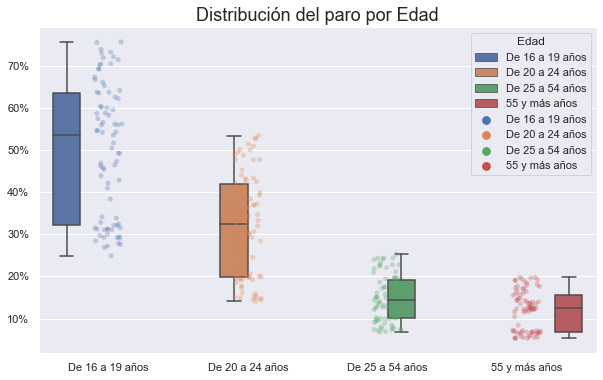

In [29]:
sns.set_theme()

fmt = '%.0f%%' # Formato de los ticks'
sns.boxplot(
    data=paroq_df,
    x = "Edad", y = "Total", 
    hue = "Edad")


ax = sns.stripplot(
    data=paroq_df,
    x = "Edad", y = "Total", 
    hue = "Edad",
    alpha=0.3)
# lo ordena por valor de total, no por alfabético de edad
# Completamos detalles con matplotlib
yticks = mtick.FormatStrFormatter(fmt) # Definimos el formato % al eje y 
ax.yaxis.set_major_formatter(yticks) # Aplicamos formato % al eje y   
plt.title("Distribución del paro por Edad", fontsize = 18) # Añadimos título
ax.set_xlabel('')  #xlabel
ax.set_ylabel('') #ylabel





Unimos los datos de Paro e inflación


## ¿Cuál es la relación entre el paro y la inflacción?


### Gráfica de doble eje en matplotlib

- Vamos a ver el uso de los subplots
- Las gráficas por separado. Documento de [cómo usar los subplots ](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html)
- Una sola gráfica


In [30]:
# Filtramos datos del paro 
parot_df = paro_df[(paro_df['Sexo'] == 'Ambos sexos')
                            & (paro_df['Edad'] == 'Total')
                            & (paro_df['ccaa'] == 'Nacional')
                            & (paro_df['month'] == 9)] #selecciono solo el mes de septiembre
parot_df.reset_index(drop=True, inplace=True)
parot_df.info()
print (paroq_df)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Sexo     20 non-null     object        
 1   ccaa     20 non-null     object        
 2   Edad     20 non-null     object        
 3   Periodo  20 non-null     datetime64[ns]
 4   Total    20 non-null     float64       
 5   month    20 non-null     int64         
 6   year     20 non-null     int64         
 7   code     20 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.4+ KB
            Sexo      ccaa             Edad    Periodo  Total  month  year  \
243  Ambos sexos  Nacional  De 16 a 19 años 2022-03-31  46.43      3  2022   
244  Ambos sexos  Nacional  De 16 a 19 años 2021-12-31  49.22     12  2021   
245  Ambos sexos  Nacional  De 16 a 19 años 2021-09-30  42.82      9  2021   
246  Ambos sexos  Nacional  De 16 a 19 años 2021-06-30 

In [31]:
# Filtramos datos de 
inflacionq_df = inflacion_df[(inflacion_df['Grupos ECOICOP'] =='Índice general')
                            & (inflacion_df['Tipo de dato'] =='Variación anual')                        
                            & (inflacion_df['month'] == 9)] #selecciono solo el mes de septiembre
inflacionq_df.reset_index(drop=True, inplace=True)

inflacionq_df.info()
print(inflacionq_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Grupos ECOICOP  20 non-null     object        
 1   Tipo de dato    20 non-null     object        
 2   Periodo         20 non-null     datetime64[ns]
 3   Total           20 non-null     float64       
 4   month           20 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 928.0+ bytes
    Grupos ECOICOP     Tipo de dato    Periodo  Total  month
0   Índice general  Variación anual 2021-09-30    4.0      9
1   Índice general  Variación anual 2020-09-30   -0.4      9
2   Índice general  Variación anual 2019-09-30    0.1      9
3   Índice general  Variación anual 2018-09-30    2.3      9
4   Índice general  Variación anual 2017-09-30    1.8      9
5   Índice general  Variación anual 2016-09-30    0.2      9
6   Índice general  V

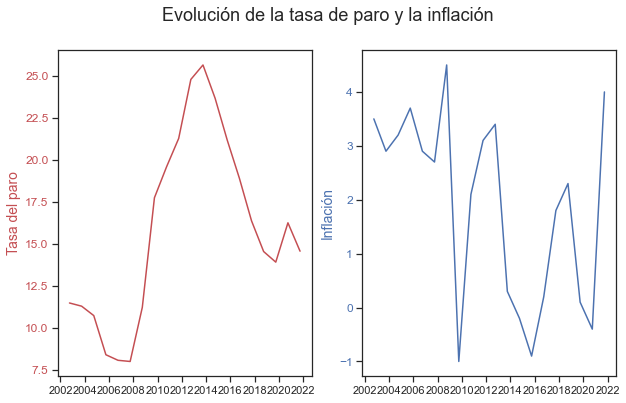

In [32]:
sns.set_style("ticks")

fig, (ax1, ax2) = plt.subplots(1, 2)   #creo dos ejes 

 
# Dibujo primer eje (paro)
ax1.plot(parot_df.Periodo,parot_df.Total, label="Tasa del paro", color='r')
ax1.set_ylabel ('Tasa del paro', fontsize=14, color='r')
ax1.yaxis.set_tick_params(labelsize=12,labelcolor='r')


# Dibujo segundo eje (inflacción)
ax2.plot(inflacionq_df.Periodo, inflacionq_df.Total,label="Inflacion", color='b')
ax2.set_ylabel ('Inflación' , fontsize=14, color='b')
ax2.yaxis.set_tick_params(labelsize=12,labelcolor='b')

# Global figure properties
plt.suptitle("Evolución de la tasa de paro y la inflación", fontsize =18)

plt.show()

- Ahora las hacemos en una gráfica

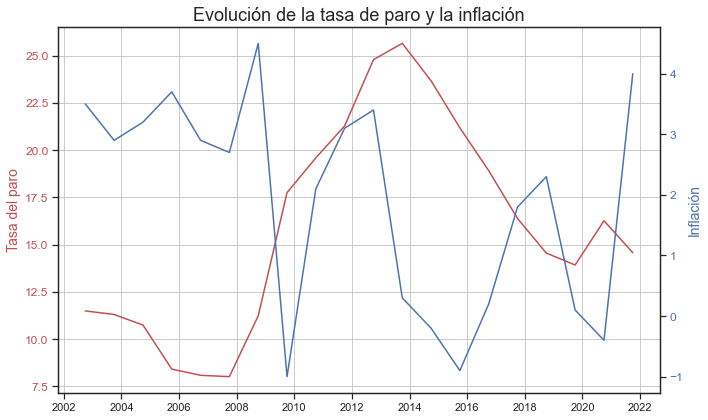

In [33]:
sns.set_style("ticks")
                           
# Separamos la figura en dos objetos  superpuestos
fig, ax1 = plt.subplots()


# Dibujo primer eje (paro)
ax1.plot(parot_df.Periodo,parot_df.Total, label="Tasa del paro", color='r')
ax1.set_ylabel ('Tasa del paro', fontsize=14, color='r')
ax1.yaxis.set_tick_params(labelsize=12,labelcolor='r')
ax1.grid (True) # Añado grid

#ax1.grid(True,axis='y')
ax2 = ax1.twinx() #compartimos el eje x entre las dos gráficas

# Dibujo segundo eje (inflacción)
ax2.plot(inflacionq_df.Periodo, inflacionq_df.Total,label="Inflacion", color='b')
ax2.set_ylabel ('Inflación' , fontsize=14, color='b')
ax2.yaxis.set_tick_params(labelsize=12,labelcolor='b')

# Global figure properties
plt.title("Evolución de la tasa de paro y la inflación", fontsize=18)


fig.tight_layout() 
plt.show()



### Gráfica doble eje  pandas-matplotlib

- Hay que convertir la fecha en índice para pintar timelines


In [34]:

parot_df.set_index('Periodo',inplace=True)
inflacionq_df.set_index('Periodo',inplace=True)

print (parot_df)
print (inflacionq_df)

                   Sexo      ccaa   Edad  Total  month  year   code
Periodo                                                            
2021-09-30  Ambos sexos  Nacional  Total  14.57      9  2021  Total
2020-09-30  Ambos sexos  Nacional  Total  16.26      9  2020  Total
2019-09-30  Ambos sexos  Nacional  Total  13.92      9  2019  Total
2018-09-30  Ambos sexos  Nacional  Total  14.55      9  2018  Total
2017-09-30  Ambos sexos  Nacional  Total  16.38      9  2017  Total
2016-09-30  Ambos sexos  Nacional  Total  18.91      9  2016  Total
2015-09-30  Ambos sexos  Nacional  Total  21.18      9  2015  Total
2014-09-30  Ambos sexos  Nacional  Total  23.67      9  2014  Total
2013-09-30  Ambos sexos  Nacional  Total  25.65      9  2013  Total
2012-09-30  Ambos sexos  Nacional  Total  24.79      9  2012  Total
2011-09-30  Ambos sexos  Nacional  Total  21.28      9  2011  Total
2010-09-30  Ambos sexos  Nacional  Total  19.59      9  2010  Total
2009-09-30  Ambos sexos  Nacional  Total  17.75 

<AxesSubplot:label='d19e60b5-4b64-4ff8-927a-a86af2cece5a'>

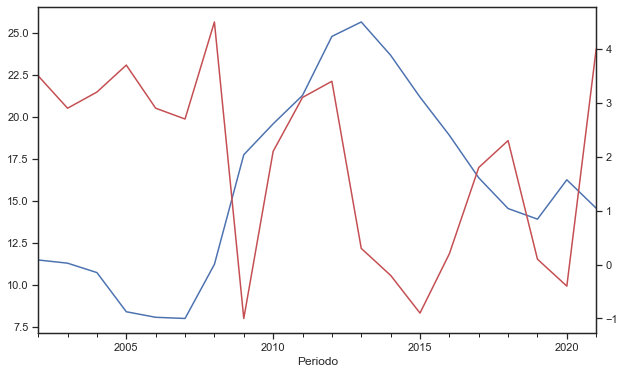

In [35]:
plt.figure()

parot_df.Total.plot()
inflacionq_df.Total.plot(secondary_y=True, style='r')



Text(0.5, 1.0, 'Evolución de la tasa de paro y la inflación')

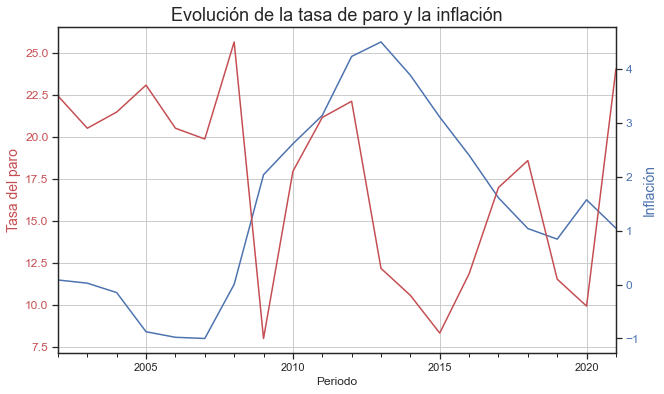

In [36]:

plt.figure()

ax1 =parot_df.Total.plot()
ax2 =inflacionq_df.Total.plot(secondary_y=True, style ='r')

# Completamos detalles con matplotlib
ax1.set_ylabel ('Tasa del paro', fontsize=14, color='r')
ax1.yaxis.set_tick_params(labelsize=12,labelcolor='r')
ax1.grid (True) # Añado grid

ax2.set_ylabel ('Inflación' , fontsize=14, color='b')
ax2.yaxis.set_tick_params(labelsize=12,labelcolor='b')

# Global figure properties
plt.title("Evolución de la tasa de paro y la inflación", fontsize=18)

### Gráfica de doble eje en seaborn 

<AxesSubplot:label='811e4c4d-4b99-435f-88fa-504771323215', xlabel='Periodo', ylabel='Total'>

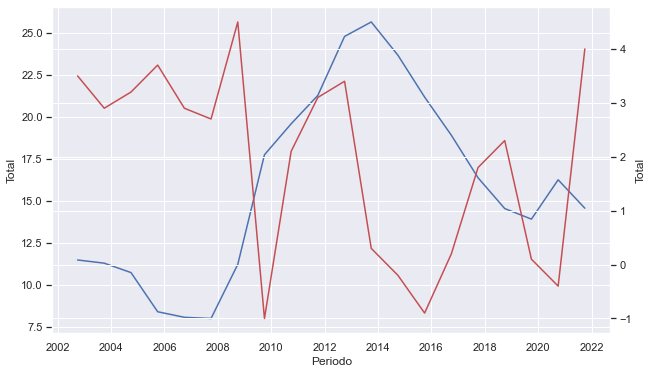

In [35]:
sns.set_theme()

sns.lineplot(data=parot_df.Total, color="b")
ax2 = plt.twinx()
sns.lineplot(data=inflacionq_df.Total, color="r", ax=ax2)
    


Text(0.5, 1.0, 'Evolución de la tasa de paro y la inflación')

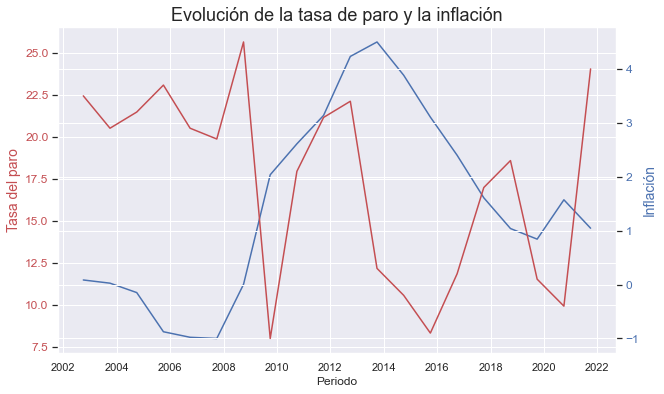

In [36]:
#Añadiendo detalles
sns.set_theme()

ax1 = sns.lineplot(data=parot_df.Total, color="b")
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=inflacionq_df.Total, color="r", ax=ax2)

# Completamos detalles con matplotlib
ax1.set_ylabel ('Tasa del paro', fontsize=14, color='r')
ax1.yaxis.set_tick_params(labelsize=12,labelcolor='r')
ax1.grid (True) # Añado grid


ax2.set_ylabel ('Inflación' , fontsize=14, color='b')
ax2.yaxis.set_tick_params(labelsize=12,labelcolor='b')

# Global figure properties
plt.title("Evolución de la tasa de paro y la inflación", fontsize=18)


### scater plot conectado en matplotlib

- Se dibuja el camino iterando el dataframe a la vez que se le ponen las etiquetas
- También se itera el color para que los más reciente sea más oscuro
- Se utiliza una paleta de color de Seaborn
- Observa que no hemos tenido que hacer un merge de los dataframes parot_df y inflacionq_df, Los valores de x e y pueden venir de datasets diferentes siempre y cuando la dimensión sea la misma
- Hay que quitar el índice de parot_df e inflaccionq_df. No deja iterar por índice


In [37]:
parot_df.reset_index(inplace=True)
inflacionq_df.reset_index(inplace=True)

print (parot_df)
print (inflacionq_df)

      Periodo         Sexo      ccaa   Edad  Total  month  year   code
0  2021-09-30  Ambos sexos  Nacional  Total  14.57      9  2021  Total
1  2020-09-30  Ambos sexos  Nacional  Total  16.26      9  2020  Total
2  2019-09-30  Ambos sexos  Nacional  Total  13.92      9  2019  Total
3  2018-09-30  Ambos sexos  Nacional  Total  14.55      9  2018  Total
4  2017-09-30  Ambos sexos  Nacional  Total  16.38      9  2017  Total
5  2016-09-30  Ambos sexos  Nacional  Total  18.91      9  2016  Total
6  2015-09-30  Ambos sexos  Nacional  Total  21.18      9  2015  Total
7  2014-09-30  Ambos sexos  Nacional  Total  23.67      9  2014  Total
8  2013-09-30  Ambos sexos  Nacional  Total  25.65      9  2013  Total
9  2012-09-30  Ambos sexos  Nacional  Total  24.79      9  2012  Total
10 2011-09-30  Ambos sexos  Nacional  Total  21.28      9  2011  Total
11 2010-09-30  Ambos sexos  Nacional  Total  19.59      9  2010  Total
12 2009-09-30  Ambos sexos  Nacional  Total  17.75      9  2009  Total
13 200

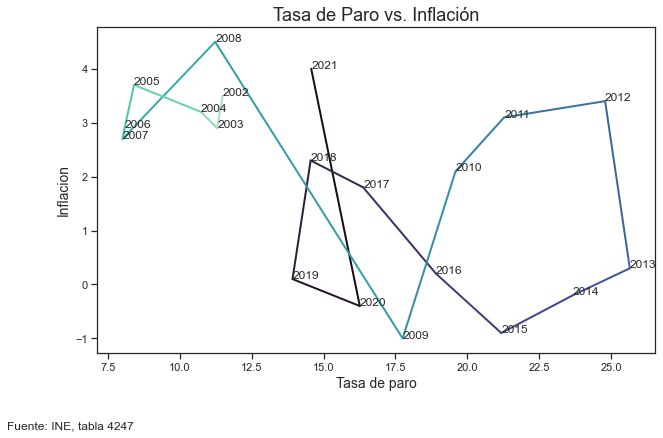

In [38]:
sns.set_style("ticks")
colores = sns.color_palette('mako', len(parot_df.index))

fig, ax = plt.subplots () # Creamos el contenedor
ax.set_xlabel('Tasa de paro', fontsize = 14) # Añadimos etiqueta eje x
ax.set_ylabel('Inflacion', fontsize = 14) # Añadimos etiqueta eje y
ax.set_title("Tasa de Paro vs. Inflación",fontsize =18)  # Añadimos título

for i in parot_df.index:
  ax.plot(parot_df.loc[i:i+1,'Total'],inflacionq_df.loc[i:i+1]['Total'],
            color=colores[::][i],lw=2)

  ax.annotate (parot_df.loc[i,'Periodo'].strftime('%Y'),
               xy = (parot_df.loc[i,'Total'],inflacionq_df.loc[i,'Total']))
plt.figtext(x=0,y=-.05,s=fuente,ha='left')	
plt.rcParams["figure.figsize"]=[10,6]
plt.show()